In [1]:
import warnings
import os
import sys

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

In [2]:
import pandas as pd
import os

# os.environ["OMP_NUM_THREADS"] = "1"

DADOS = "../dados/Mall_Customers_no_CustomerID.csv"

df = pd.read_csv(DADOS)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    [
        ("standard", StandardScaler(), ["Age", "Annual Income (k$)", "Spending Score (1-100)"]),
        ("onehot", OneHotEncoder(), ["Gender"])
    ]
)

preprocessing.fit_transform(df)

df_scaled = pd.DataFrame(
    preprocessing.fit_transform(df),
    columns=preprocessing.get_feature_names_out(),
)

df_scaled.head()

,standard__Age,standard__Annual Income (k$),standard__Spending Score (1-100),onehot__Gender_Female,onehot__Gender_Male
0,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.352802,-1.700830,-1.715913,1.0,0.0
3,-1.137502,-1.700830,1.040418,1.0,0.0
4,-0.563369,-1.662660,-0.395980,1.0,0.0


In [4]:
preprocessing

ColumnTransformer(transformers=[('standard', StandardScaler(),
                                 ['Age', 'Annual Income (k$)',
                                  'Spending Score (1-100)']),
                                ('onehot', OneHotEncoder(), ['Gender'])])

In [5]:
preprocessing.get_feature_names_out()

array(['standard__Age', 'standard__Annual Income (k$)',
       'standard__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [6]:
df_scaled.to_csv("../dados/Mall_Customers_no_CustomerID_scaled.csv", index=False)

## Standard Scaling 📊
Standard Scaling, also known as Z-score normalization, is a technique used to scale numeric input features so that they have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean value of each feature from the dataset and then dividing by the standard deviation.

### When to use Standard Scaling:

When your model assumes that the data is normally distributed, or when you want to make your features more comparable and avoid issues with models that are sensitive to the scale of the data, such as linear regression, logistic regression, support vector machines, neural networks, and k-nearest neighbors.
It's particularly useful when the features in your dataset have different units of measurement or when their ranges vary a lot.

## One-Hot Encoding ♨️
One-Hot Encoding is a method used to convert categorical data into a format that can be provided to ML algorithms to do a better job in prediction. For each unique category value in a feature, one-hot encoding creates a new binary column (1s and 0s) indicating the presence or absence of the category.

### When to use One-Hot Encoding:

When dealing with categorical data, especially if the categories do not have an ordinal relationship. This ensures that the model does not attribute a natural order to categories where it doesn’t exist. For example, encoding the categories "dog", "cat", and "bird" in a pet feature since these categories cannot be meaningfully ordered.
It is widely used before feeding categorical data to many kinds of models, as most machine learning algorithms cannot work directly with categorical data.

# Key Differences:

> Application: Standard Scaling is applied to numeric data, while One-Hot Encoding is applied to categorical data.

> Purpose: Standard Scaling normalizes the scale of numeric features, while One-Hot Encoding converts categorical features into a format that can be provided to ML algorithms.

## ColumnTransformer 🏛️
The basic idea behind ColumnTransformer is that it allows you to specify which transformations to apply to which columns in your data. You can apply a specific transformation (or series of transformations) to a subset of columns and a different transformation to other columns. This is especially useful in a pipeline that automates the process of applying these transformations to new data, including the data used for training and the unseen data used for prediction.

### How It Works
- Initialization: When initializing a ColumnTransformer, you provide it with a list of tuples. Each tuple contains a name, a transformer, and a column or columns to which that transformer should be applied. The transformer can be any object that follows scikit-learn's fit/transform interface, such as preprocessing functions like StandardScaler for numerical data or OneHotEncoder for categorical data.

- Fitting: When you fit the ColumnTransformer to your data, it internally fits each transformer to the columns specified for it.

- Transforming: When transforming your data, the ColumnTransformer applies each transformer to its respective columns and then concatenates the results. This means you get a single transformed output that you can feed directly into your machine learning model.

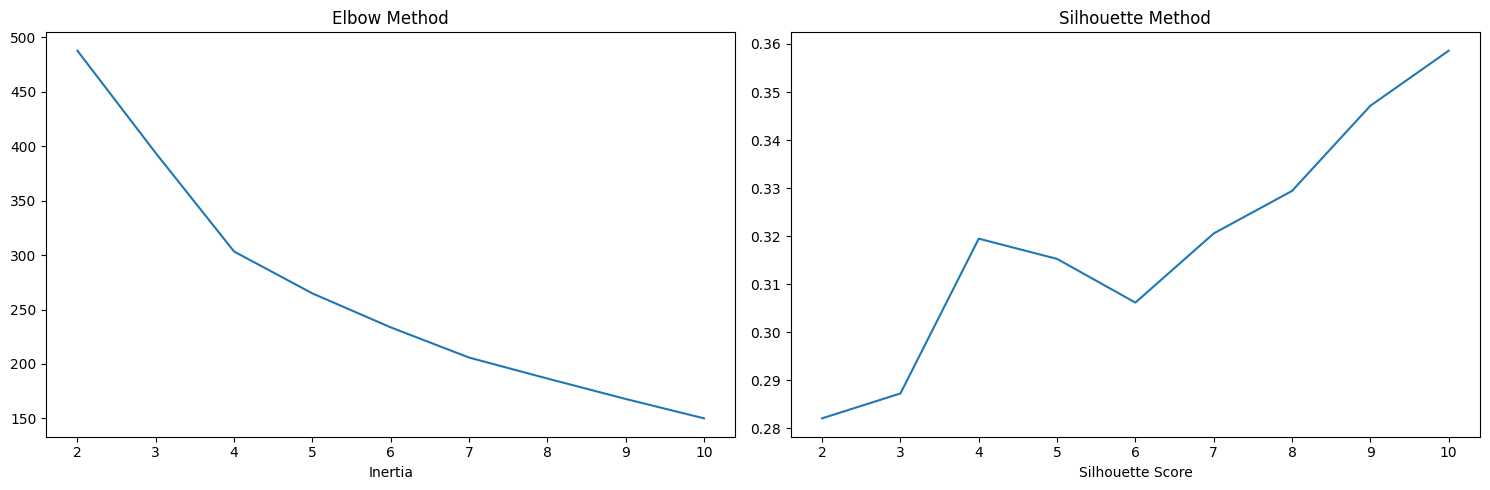

In [7]:
from funcoes_auxiliares import graficos_elbow_silhouette

graficos_elbow_silhouette(df_scaled)